In [5]:
import numpy as np
from itertools import permutations
from itertools import combinations_with_replacement
from itertools import product

DIM = 4

In [2]:
def Genz_points(m, dimensions=3):
    '''
    A function to create an array with Genz points with given m and a number of dimensions
    '''
    available_numbers = np.arange(1,m+2-dimensions)
    perm = np.array(list(product(available_numbers,repeat=dimensions)))
    sums = np.sum(perm,axis=1)
    indeces = [1*x==m for x in sums]#list of which permutations have sum(j_i)=m
    points = np.sqrt(perm[indeces]/m)
    points = np.array([points*comb for comb in (list(product([-1,1],repeat=dimensions)))])
    result = np.reshape(points, (points.shape[0]*points.shape[1],dimensions))
    #result = np.sqrt(points/m)
    return result


genz = Genz_points(45, dimensions=DIM)

In [3]:
genz

array([[-0.1490712 , -0.1490712 , -0.97752522],
       [-0.1490712 , -0.21081851, -0.96609178],
       [-0.1490712 , -0.25819889, -0.9545214 ],
       ...,
       [ 0.96609178,  0.1490712 ,  0.21081851],
       [ 0.96609178,  0.21081851,  0.1490712 ],
       [ 0.97752522,  0.1490712 ,  0.1490712 ]])

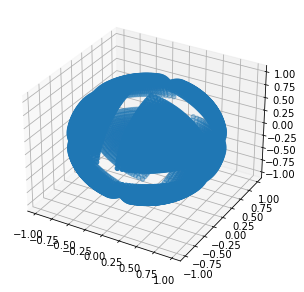

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(*genz.T)

plt.show()

In [3]:
def Linear_disc_points(m, dimensions=3):
    '''
    A function to create an array with points created via linear discretisation
    '''
    available_numbers = np.arange(1,m+2-dimensions)
    perm = np.array(list(product(available_numbers,repeat=dimensions)))
    sums = np.sum(perm,axis=1)
    indeces = [1*x==m for x in sums]#list of which permutations have sum(j_i)=m
    points = perm[indeces]
    points = np.array([points*comb for comb in (list(product([-1,1],repeat=dimensions)))])
    points = np.reshape(points, (points.shape[0]*points.shape[1], dimensions))

    result = np.asarray([point/np.linalg.norm(point) for point in points])

    return result

line = Linear_disc_points(75, dimensions=DIM)

In [6]:
line

array([[-0.01369606, -0.01369606, -0.9998124 ],
       [-0.0138822 , -0.02776439, -0.9995181 ],
       [-0.01407056, -0.04221167, -0.99900961],
       ...,
       [ 0.9995181 ,  0.0138822 ,  0.02776439],
       [ 0.9995181 ,  0.02776439,  0.0138822 ],
       [ 0.9998124 ,  0.01369606,  0.01369606]])

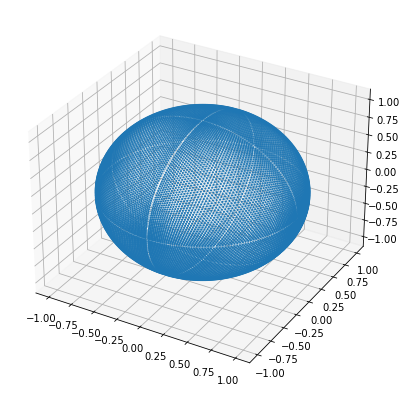

In [7]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(*line.T, s=1)

plt.show()

In [8]:
def Volleyball_points(m, dimensions=3):
    '''
    A function to create an array with points distributed via the volleyball method
    '''
    available_numbers = np.arange(0, m+1)
    perm = np.array(list(permutations(available_numbers,dimensions)))
    indeces = [np.any(x) for x in np.greater_equal(perm, m)]
    points = perm[indeces]
    points = np.array([points*comb for comb in (list(product([-1,1],repeat=dimensions)))])
    points = np.reshape(points, (points.shape[0]*points.shape[1], dimensions))
    result = np.asarray([point/np.linalg.norm(point) for point in points])
    return result

voll4 = Volleyball_points(30, dimensions=DIM)

In [12]:
voll4.size

6236160

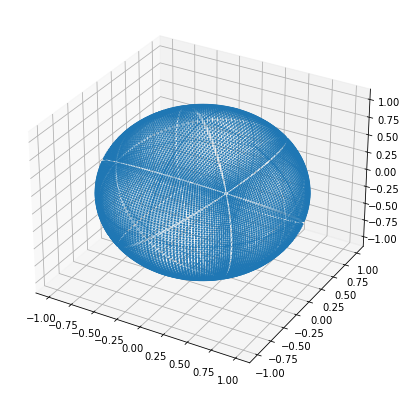

In [10]:
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(*voll.T, s=1)

plt.show()

In [23]:
class PrimesIter:
    '''
    An Iterator to get the first m primes.
    '''
    def __init__(self, m):
        self.max = m

    def __iter__(self):
        self.n = 1
        self.number = 0
        return self

    def __next__(self):
        if self.number < self.max:
            self.n += 1
            i=2
            while i < int(np.sqrt(self.n)) + 1:
                if self.n % i == 0:
                    self.n += 1
                    i = 2
                i += 1
            else:
                self.number += 1
                return self.n
        else:
            raise StopIteration



In [26]:
import numpy as np
from itertools import combinations
from fibonacci import generate_vertices
from lattice_actions import get_neighbors, vertice_distances
from su2_element import SU2_element, su2_product

lattice = generate_vertices(2**3)
neig,ind = get_neighbors(lattice, neighbors=3)
test = SU2_element.vectorize_init(lattice)
print(lattice, neig, ind)

[[ 1.          0.          0.          0.        ]
 [ 0.6633853   0.12838421 -0.08296187 -0.73249899]
 [ 0.45226142 -0.58583873 -0.65546283  0.15040302]
 [ 0.26493208  0.49632622  0.2744029   0.77985532]
 [ 0.08737778 -0.31250864  0.8512636  -0.41237574]
 [-0.08737778  0.85458326 -0.27360523 -0.43265778]
 [-0.26493208  0.02838537 -0.7514777   0.60356154]
 [-0.45226142 -0.71260742  0.38077512  0.37770436]] [[[ 0.6633853   0.12838421 -0.08296187 -0.73249899]
  [ 0.45226142 -0.58583873 -0.65546283  0.15040302]
  [ 0.26493208  0.49632622  0.2744029   0.77985532]]

 [[ 1.          0.          0.          0.        ]
  [-0.08737778  0.85458326 -0.27360523 -0.43265778]
  [ 0.08737778 -0.31250864  0.8512636  -0.41237574]]

 [[ 1.          0.          0.          0.        ]
  [-0.26493208  0.02838537 -0.7514777   0.60356154]
  [ 0.6633853   0.12838421 -0.08296187 -0.73249899]]

 [[ 1.          0.          0.          0.        ]
  [-0.26493208  0.02838537 -0.7514777   0.60356154]
  [-0.0873777

In [22]:
import sympy as smp
import numpy as np

xi, yi, zi, xj, yj, zj = smp.symbols("x_i y_i z_i x_j y_j z_j", real=True)
d1 = smp.cos(xi) - smp.cos(xj)
d2 = smp.sin(xi)*smp.cos(yi) - smp.sin(xj)*smp.cos(yj)
d3 = smp.sin(xi)*smp.sin(yi)*smp.cos(zi) - smp.sin(xj)*smp.sin(yj)*smp.cos(zj)
d4 = smp.sin(xi)*smp.sin(yi)*smp.sin(zi) - smp.sin(xj)*smp.sin(yj)*smp.sin(zj)
d = d1**2 + d2**2 + d3**2 + d4**2

In [24]:
d = d.simplify()

-2*sin(x_i)*sin(x_j)*sin(y_i)*sin(y_j)*cos(z_i - z_j) - 2*sin(x_i)*sin(x_j)*cos(y_i)*cos(y_j) - 2*cos(x_i)*cos(x_j) + 2

In [1]:
import numpy as np
from fibonacci import generate_vertices
from derivative import forward_derivative
from lattice_actions import get_neighbors

lattice = generate_vertices(2**10)
n,_ = get_neighbors(lattice)
#L1 = forward_derivative(lattice, 1)
#L2 = forward_derivative(lattice, 2)
#L3 = forward_derivative(lattice, 3)

[[0.         0.16639504 0.20973057 ... 1.98244387 1.9855279  1.98897287]
 [0.16639504 0.         0.29093517 ... 1.98317739 1.99388191 1.97518306]
 [0.20973057 0.29093517 0.         ... 1.94505463 1.98681643 1.98407928]
 ...
 [1.98244387 1.98317739 1.94505463 ... 0.         0.41089998 0.34922066]
 [1.9855279  1.99388191 1.98681643 ... 0.41089998 0.         0.35527579]
 [1.98897287 1.97518306 1.98407928 ... 0.34922066 0.35527579 0.        ]]


In [3]:
from numba import njit


#@njit
def foo(arr):
    return np.argsort(arr)

a = np.random.rand(10000,10000)
foo(a)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mNo implementation of function Function(<function argsort at 0x00000134FF573040>) found for signature:
 
 >>> argsort(array(float64, 2d, C))
 
There are 2 candidate implementations:
[1m  - Of which 2 did not match due to:
  Overload of function 'argsort': File: numba\core\typing\npydecl.py: Line 348.
    With argument(s): '(array(float64, 2d, C))':[0m
[1m   No match.[0m
[0m
[0m[1mDuring: resolving callee type: Function(<function argsort at 0x00000134FF573040>)[0m
[0m[1mDuring: typing of call at <ipython-input-3-fd63ebe50576> (6)
[0m
[1m
File "<ipython-input-3-fd63ebe50576>", line 6:[0m
[1mdef foo(arr):
[1m    return np.argsort(arr)
[0m    [1m^[0m[0m
